In [ ]:
import tensorflow as tf
# tải dữ liệu có sẵn trong keras
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#phần dũ liệu trainning có 60000 ảnh kích thước 28*28
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
#phần dữ liệu testing có 10000 ảnh kích thước 28*28
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

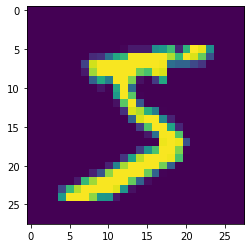

In [ ]:
plt.imshow(x_train[0])

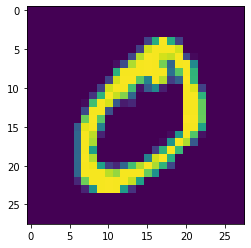

In [ ]:
plt.imshow(x_train[1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#tách tập trainning ban đầu thành 2 tập (train và val) theo tỉ lệ 7/3 và trộn lẫn các phần tử của chúng theo thứ tự
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [ ]:
#chuẩn hóa dũ liệu
#chia toàn bộ ma trận ảnh cho 255 để giá trị của các phần tử trong ma trận <1 
x_train=x_train.astype("float")/255.0

In [ ]:
#chuẩn hóa dũ liệu
#chia toàn bộ ma trận ảnh cho 255 để giá trị của các phần tử trong ma trận <1 
x_val=x_val.astype("float")/255.0

In [ ]:
# Thêm 1 chiều nữa cho ma trận tương ứng với số kênh (trường họp này thêm số kênh=1 vì là ảnh đen trắng)
x_train=tf.expand_dims(x_train,axis=-1)
x_val=tf.expand_dims(x_val,axis=-1)

In [ ]:
# ma trận bộ train sau khi thêm chiều số kênh màu
x_train.shape

TensorShape([45000, 28, 28, 1])

In [ ]:
# ma trận bộ val sau khi thêm chiều số kênh màu
x_val.shape

TensorShape([15000, 28, 28, 1])

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
#khởi tạo bộ chuyển đổi nhãn nhị phân
lb = LabelBinarizer()

In [ ]:
#thực hiện chuyển đổi sang nhãn nhị phân
trainY = lb.fit_transform(y_train)
validY = lb.fit_transform(y_test)

In [ ]:
print(trainY[0])

[1 0 0 0 0 0 0 0 0 0]


In [ ]:
#KHAI báo các thư viện cần thiết cho mô mình CNN
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()

In [ ]:
#khai báo kích thước ảnh 28*28 và đầu ra là 10 lớp
width = 28
height = 28
classes = 10

In [ ]:
#khai báo kích thước của 1 ảnh
shape = (width, height, 1)

In [ ]:
#cấu trúc mạng xương sống

model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape)) #pading same để đầu ra k bị mất kích thước của ảnh
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dense(classes))

In [ ]:
#Đầu ra cuối là 1 hàm softmax với 10 đầu ra 
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3211776   
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                        

In [ ]:
#thêm dữ liệu tăng cường, cứ cách 64 ảnh train sẽ quay 1 góc ngẫu nhiên để dữ liệu thêm đa dạng
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [ ]:
learning_rate = 0.01

In [ ]:
epochs = 20
# epoch
# Steps
# 
batch_size = 64

In [ ]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [ ]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#Huấn luyện mô hình với tập train
print("Start training")
model.fit_generator(aug.flow(x_train, trainY, batch_size=batch_size), validation_data=(x_val, validY), steps_per_epoch=x_train.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training


<ipython-input-33-6c479c353906>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(aug.flow(x_train, trainY, batch_size=batch_size), validation_data=(x_val, validY), steps_per_epoch=x_train.shape[0]//batch_size, epochs=epochs, verbose=1)


Epoch 1/20
703/703 [==============================] - 64s 90ms/step - loss: 1.1782 - accuracy: 0.5962 - val_loss: 0.5382 - val_accuracy: 0.8110
Epoch 2/20
703/703 [==============================] - 63s 89ms/step - loss: 0.5791 - accuracy: 0.8104 - val_loss: 0.3533 - val_accuracy: 0.8836
Epoch 3/20
703/703 [==============================] - 63s 89ms/step - loss: 0.4539 - accuracy: 0.8512 - val_loss: 0.2800 - val_accuracy: 0.9089
Epoch 4/20
703/703 [==============================] - 63s 90ms/step - loss: 0.3891 - accuracy: 0.8730 - val_loss: 0.2391 - val_accuracy: 0.9240
Epoch 5/20
703/703 [==============================] - 63s 90ms/step - loss: 0.3464 - accuracy: 0.8897 - val_loss: 0.2267 - val_accuracy: 0.9240
Epoch 6/20
703/703 [==============================] - 62s 88ms/step - loss: 0.3173 - accuracy: 0.8979 - val_loss: 0.2230 - val_accuracy: 0.9294
Epoch 7/20
703/703 [==============================] - 62s 88ms/step - loss: 0.2970 - accuracy: 0.9047 - val_loss: 0.2188 - val_accuracy:

In [ ]:
x_test=x_test.astype("float")/255.0
x_test=tf.expand_dims(x_test,axis=-1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#lưu file model
model.save("sang1.h5")

In [ ]:
cd /content/drive/MyDrive/nckh thầy thắng/deep_learing/MNIST

/content/drive/MyDrive/nckh thầy thắng/deep_learing/MNIST


In [ ]:
saved_model = tf.keras.models.load_model("sang1.h5")

In [ ]:
#thực hiện dự đoán đâu ra 10 mẫu đầu tiên của bộ test
result = saved_model.predict(x_test[0:11])

1/1 [==============================] - 0s 141ms/step


In [ ]:
import numpy as np

In [ ]:
#kết quả dự đoán
y_pre = [np.argmax(element) for element in result]
y_pre[:11]

[7, 2, 1, 0, 4, 1, 4, 9, 2, 9, 0]

In [ ]:
#đầu ra thực tế 
y_test[:11]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0], dtype=uint8)

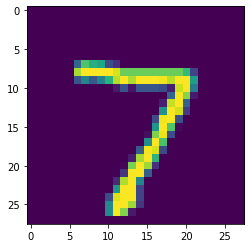

In [ ]:
#ảnh đầu tiên
plt.imshow(x_test[0])

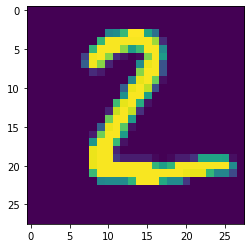

In [ ]:
#ảnh thứ 2
plt.imshow(x_test[1])